# Machine Learning Through Linear Regression

## Import Necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

### 1. Picking a dataset to use regression models

In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

# Initial glimpse of dataset when loaded
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
# Coverting the data into dataframe to improve readability

housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [9]:
# creating features and target value
housing_df["MedHouseVal"] = housing["target"]

# Combine dataframe with features and target values
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [32]:
# Checking if data has null values
housing_df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [20]:
# Importing an algorithm to split the data into training an testing

from sklearn.model_selection import train_test_split

np.random.seed(42)

# Split target and features into X and y

X = housing_df.drop("MedHouseVal",axis=1)
y = housing_df["MedHouseVal"]

# Applying model to split the data 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Checking the number of rows in training and testing datasets
print("Training sample size : " + str(X_train.shape[0]) )
print("Testing sample size : " + str(X_test.shape[0]) )


Training sample size : 16512
Testing sample size : 4128


In [23]:
# Since we dont know the features are important, using Ridge Regression for now

from sklearn.linear_model import Ridge

# Creating model here and fitting to dataset

model = Ridge()
model.fit(X_train,y_train)

# Checking the R square value(score) of model on training data

model.score(X_train,y_train)


0.6125511245209703

In [24]:
# Checking the R square value(score) of model on testing data

model.score(X_test,y_test)

0.5758549611440128

In [29]:
# Changing the model to improve Rsquare value

from sklearn.linear_model import ElasticNet

# Creating model here and fitting to dataset

model = ElasticNet()
model.fit(X_train,y_train)

# Checking the R square value(score) of model on training data

model.score(X_train,y_train)

0.42697503980879004

In [30]:
# As R square value is still not improved, trying different model

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Creating model here and fitting to dataset

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

# Checking the R square value(score) of model on training data

model.score(X_train,y_train)


0.9735726320302575

### As observed, the R square value has significantly improved by using Random forest model


In [31]:
# Fitting the model on test data
model.score(X_test,y_test)

0.8051230593157366

## Checking the model performance

In [42]:
from sklearn.metrics import r2_score,mean_squared_error

y_pred = model.predict(X_test)
y_test = np.array(y_test)

# Finding the r square value
r2_score(y_test, y_pred)


0.8051230593157366

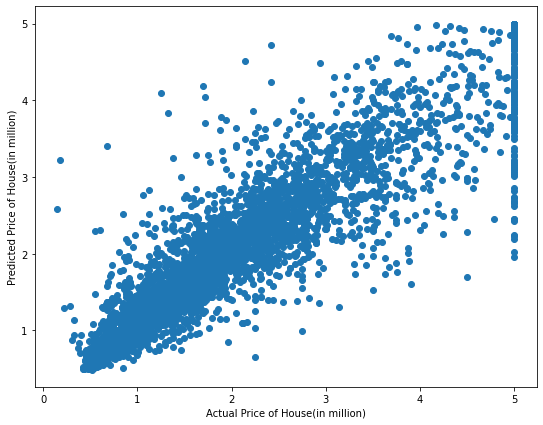

In [48]:
# Plottting the tested and predicted values in a pyplot

%matplotlib inline

plt.rcParams["figure.figsize"] = [9, 7]
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price of House(in million)")
plt.ylabel("Predicted Price of House(in million)")
plt.show()

## Testing the Model

In [67]:
# Testing model with sample input from testing dataframe

test_df  = housing_df[housing_df.index.isin([20046])]
test_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.477


In [75]:
# Giving the inputs to model to predict

house_price = model.predict(test_df.drop("MedHouseVal",axis=1))

print("Predicted price of dataframe (in millions) : " + str(house_price[0].round(3)))

Predicted price of dataframe (in millions) : 0.509


In [70]:
print("Actual price of dataframe (in millions) :" + str(y_test[0]))

Actual price of dataframe (in millions) :0.477
